<a href="https://colab.research.google.com/github/satyaprem95/NLP-LAB-ASSIGNMENT-01/blob/main/073_NLP_LAB_ASSIGNMENT_01_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME: P. SATYA PREM
# PRN: 22070126073
# AIML- A3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/assignment-01_NLP.csv")
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
# Rename columns
df.columns = ['target','id', 'date', 'flag', 'user', 'text']

In [ ]:
df.head() #printing df.head() after setting up right column names and removing unwanted feature

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
# Check unique classes in the target column
unique_classes = df['target'].unique()
num_classes = len(unique_classes)

print(f"Unique classes in the 'target' column: {unique_classes}")
print(f"Number of unique classes: {num_classes}")

Unique classes in the 'target' column: [0 4]
Number of unique classes: 2


In [ ]:
df.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048575 non-null  int64 
 1   id      1048575 non-null  int64 
 2   date    1048575 non-null  object
 3   flag    1048575 non-null  object
 4   user    1048575 non-null  object
 5   text    1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [ ]:
# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Initialize NLTK components
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove symbols
    text = re.sub(r'\@w+|[^A-Za-z0-9 ]+', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization and stopwords removal
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back to string
    return ' '.join(tokens)

In [ ]:
# Apply the preprocess function to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)


In [ ]:
# Display the first few rows of the preprocessed data
print(df[['text', 'processed_text']].head())

                                                text  \
0  is upset that he can't update his Facebook by ...   
1  @Kenichan I dived many times for the ball. Man...   
2    my whole body feels itchy and like its on fire    
3  @nationwideclass no, it's not behaving at all....   
4                      @Kwesidei not the whole crew    

                                      processed_text  
0  upset cant update facebook texting might cry r...  
1  kenichan dived many time ball managed save 50 ...  
2                    whole body feel itchy like fire  
3           nationwideclass behaving im mad cant see  
4                                kwesidei whole crew  


Count Vectorizer: The Count Vectorizer is a straightforward text representation technique used in natural language processing. It transforms text data into a numerical format by counting the number of times each word appears in a document. This method creates a sparse matrix where rows represent documents and columns represent words from the vocabulary. Each cell in the matrix holds the count of the corresponding word in the corresponding document. While Count Vectorizer is simple and easy to implement, it can produce large, sparse matrices and doesn't account for the relative importance of words or their context within the corpus.

TF-IDF Vectorizer: The TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer is a more advanced text representation technique that builds on the Count Vectorizer by incorporating the importance of words across a corpus. It combines two metrics: term frequency (TF), which measures how frequently a word appears in a document, and inverse document frequency (IDF), which evaluates how unique or rare a word is across all documents. By multiplying these two metrics, TF-IDF assigns higher weights to words that are frequent in a specific document but rare across the entire dataset. This approach helps in highlighting more relevant words and reduces the influence of common, less informative words, leading to more meaningful feature representations for machine learning models.

In [ ]:
#Vectorization using CountVectorizer and TFIDFVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize vectorizers
count_vect = CountVectorizer()
tfidf_vect = TfidfVectorizer()

# Apply CountVectorizer
X_count = count_vect.fit_transform(df['processed_text'])

# Apply TFIDFVectorizer
X_tfidf = tfidf_vect.fit_transform(df['processed_text'])

# Display shapes of the vectorized data
print(f"CountVectorizer shape: {X_count.shape}")
print(f"TFIDFVectorizer shape: {X_tfidf.shape}")

CountVectorizer shape: (1048575, 540436)
TFIDFVectorizer shape: (1048575, 540436)


logistic regression is often employed for text classification tasks, such as sentiment analysis, spam detection, and topic categorization. Here, the text data is typically converted into numerical features using techniques like TF-IDF or word embeddings, which represent the textual information in a format suitable for machine learning models. Logistic regression then uses these features to predict the probability of a document belonging to a specific class. For example, in sentiment analysis, logistic regression can classify text as positive or negative by learning the relationship between the textual features and the sentiment labels. Despite its simplicity, logistic regression can be quite effective in NLP due to its ability to handle high-dimensional data and provide probabilistic interpretations of predictions, which are valuable for understanding the model's confidence in its classifications.

Logistic Regression with CountVectorizer:


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'C': 1}
              precision    recall  f1-score   support

           0       0.86      0.94      0.90    160026
           4       0.72      0.50      0.59     49689

    accuracy                           0.84    209715
   macro avg       0.79      0.72      0.74    209715
weighted avg       0.83      0.84      0.82    209715



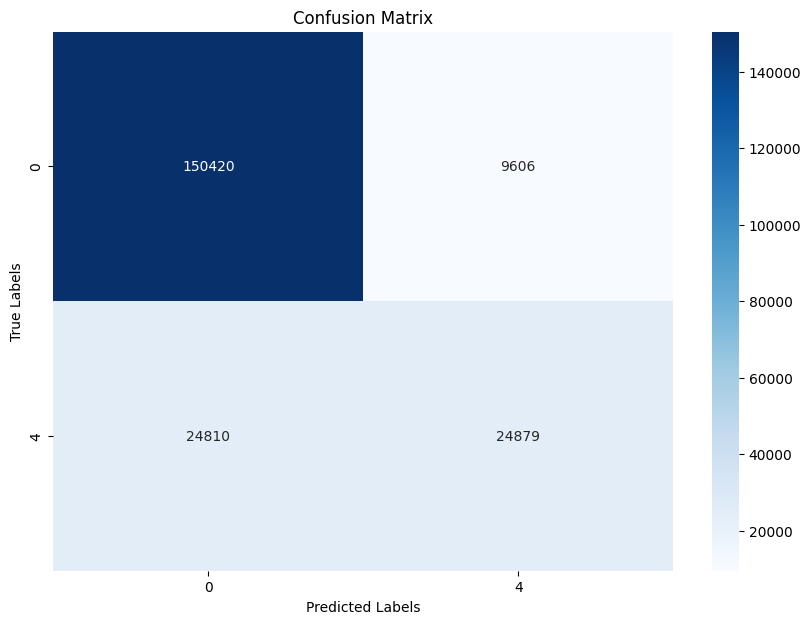

Logistic Regression with TFIDFVectorizer:
Best Parameters: {'C': 1}
              precision    recall  f1-score   support

           0       0.86      0.95      0.90    160026
           4       0.74      0.49      0.59     49689

    accuracy                           0.84    209715
   macro avg       0.80      0.72      0.74    209715
weighted avg       0.83      0.84      0.83    209715



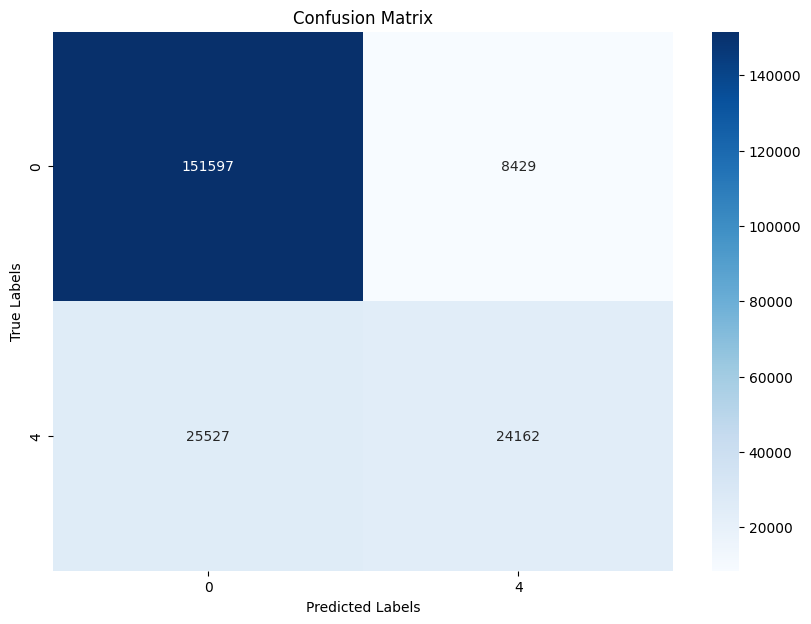

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, df['target'], test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, df['target'], test_size=0.2, random_state=42)

# Define parameter grid for Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}

# Function to evaluate the Logistic Regression model
def evaluate_model(model, param_grid, X_train, X_test, y_train, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model and parameters
    print(f"Best Parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # Predictions and evaluation
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '4'], yticklabels=['0', '4'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate Logistic Regression with CountVectorizer
print("Logistic Regression with CountVectorizer:")
evaluate_model(LogisticRegression(max_iter=1000), param_grid_lr, X_train_count, X_test_count, y_train, y_test)

# Evaluate Logistic Regression with TFIDFVectorizer
print("Logistic Regression with TFIDFVectorizer:")
evaluate_model(LogisticRegression(max_iter=1000), param_grid_lr, X_train_tfidf, X_test_tfidf, y_train, y_test)


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
!pip install pypandoc

In [ ]:
!jupyter nbconvert --to PDF "drive/My drive/Colab Notebooks/073_NLP_LAB_ASSIGNMENT-01-LR.ipynb"

[NbConvertApp] WARNING | pattern 'drive/My drive/Colab Notebooks/073_NLP_LAB_ASSIGNMENT-01-LR.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent 